# Machine Learning Project 2021
##### Davide Raffaelli
## Predicting taxonomic identity and genetic composition based on codon usage bias levels

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [54]:
df = pd.read_csv("train.csv")
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop("SpeciesID", inplace=True, axis=1)
df.drop("SpeciesName", inplace=True, axis=1)
df
kingdoms = np.unique(df.iloc[:,0:1])

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,6686,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,...,0.00643,0.02064,0.01182,0.02812,0.00838,0.03365,0.01974,0.01511,0.00030,0.00030
1,inv,0,10060,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,...,0.00268,0.00915,0.01412,0.03280,0.02555,0.03708,0.05398,0.03330,0.00030,0.00050
2,bct,0,14031,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,...,0.00114,0.01775,0.00499,0.03756,0.02523,0.05388,0.01946,0.02245,0.00121,0.00086
3,bct,0,39839,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,...,0.01177,0.00705,0.00422,0.03316,0.02229,0.03444,0.02370,0.00831,0.00028,0.00063
4,vrt,1,5112,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,...,0.00000,0.00000,0.00000,0.00020,0.01389,0.02465,0.00352,0.00352,0.00000,0.02465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,pln,0,1791,0.02289,0.02959,0.00614,0.02680,0.01452,0.02178,0.00558,...,0.00558,0.00893,0.01173,0.03071,0.01954,0.01787,0.02848,0.03127,0.00112,0.00000
10418,vrl,0,68352,0.02532,0.01557,0.00878,0.01185,0.01160,0.02654,0.00979,...,0.00477,0.01274,0.01008,0.02070,0.00726,0.02388,0.02233,0.01814,0.00025,0.00038
10419,bct,0,2292,0.01614,0.02618,0.00131,0.01003,0.02661,0.01658,0.00218,...,0.01702,0.00175,0.00567,0.02487,0.00000,0.02661,0.02618,0.01353,0.00000,0.00349
10420,pln,2,1022,0.00196,0.01761,0.04501,0.03131,0.02544,0.00978,0.01761,...,0.00391,0.01566,0.00391,0.02348,0.01957,0.03523,0.00978,0.00196,0.00000,0.00196


Let's check if there are some NAs

In [55]:
np.any(df.isna(), axis=1).sum()

0

We order by kingdom to have a nice plot.

In [56]:
df.sort_values(by = ["Kingdom"], inplace = True, ignore_index=True)

## Data visualization

Choose colors

In [ ]:
colors=sns.color_palette("tab10", 11)

Plot samples

In [ ]:
sns.countplot(x="Kingdom",data=df,palette=colors)
df["Kingdom"].value_counts()

In [ ]:
sns.countplot(x="DNAtype",data=df,palette=colors)
df["DNAtype"].value_counts()

As we can see, the outcomes are unbalanced, so we have to keep in mind this when we do our analysis.

In this project we want to use clustering and classification techniques so, since there are many classes with a really low number of samples, we want to exclude the samples that belong to classes with only one sample or with a very few samples (< 0.25% of the dataset).

Before this, it seems right to see for Kingdom = plm and DNAtype = 4 (the bigger classes of those we want to delete) the relative other outcome, in order to check if there is a link.

In [ ]:
df[df["Kingdom"] == "plm"]
df[df["DNAtype"] == 4]

As we can see the samples of plm kingdom type are of 0 DNAtype, which it doesn't seem strange since DNAtype 0 is more or less 2/3 of total database.

A more interesting information is that almost all samples with DNAtype = 4 are pln. Since the number of samples with DNAtype = 4 is < 0.25% of database, I decided to drop the samples of this class, but for future researches in which there are more data, it could be useful to inspect deeper this relation.

In [57]:
df = df[df["Kingdom"] != "plm"]
df = df[df["DNAtype"] <= 2]
df.reset_index(inplace = True, drop = True)
df["Kingdom"].value_counts()
df["DNAtype"].value_counts()

bct    2334
vrl    2265
pln    1992
vrt    1662
inv    1067
mam     458
phg     176
rod     172
pri     144
arc     101
Name: Kingdom, dtype: int64

0    7393
1    2320
2     658
Name: DNAtype, dtype: int64

As we can see the dataset contains a lot of data and, since my laptop is very cheap I cannot run some algorithm with the complete dataset. So we have to create a smaller dataset and use it for the most time and memory consuming algorithm.

In [ ]:
fraction = 0.5
small_df_indexes = []
seed = 444
for kingdom in df["Kingdom"].unique() :
    np.random.seed(seed)
    seed = seed + 1
    small_df_indexes.extend(
        np.random.choice(df[df["Kingdom"] == kingdom].index.values,
                         size = int(round(df[df["Kingdom"] == kingdom].index.values.size * fraction)), 
                         replace = False))
small_df_indexes = np.sort(np.array(small_df_indexes))

Now we check if the data distribution of DNAtype of the small dataset is similar to the complete dataset. The distribution of Kingdom is the same because we use 60% of sample for each kingdom.

In [ ]:
sns.countplot(x="DNAtype",data=df.iloc[small_df_indexes],palette=colors)

# print fraction of samples
df["DNAtype"].iloc[small_df_indexes].value_counts() / df["DNAtype"].value_counts()

As we can see the proportion is right after the sampling.

Correlation between covariates

<AxesSubplot:>

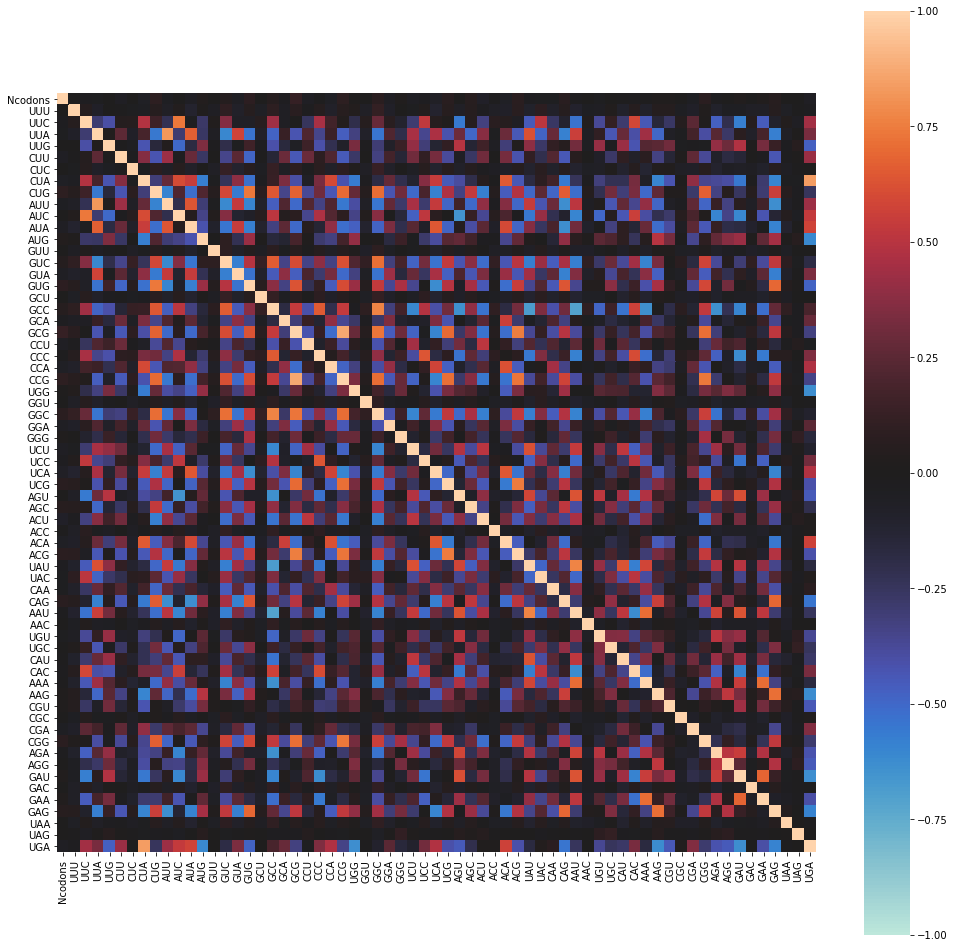

In [58]:
fig=plt.figure(figsize=(17,17))
cormat=df.iloc[:,2:].corr()
sns.heatmap(cormat,vmin=-1,vmax=1,square=True, cmap = sns.color_palette("icefire", as_cmap=True))

As we can see we have some covariates that are highly correlated, indicating that there can be collinearity. Now we want to know the pair of covariates that are most correlated.

In [60]:
cov_names = list(cormat)
cov_correlated = []
for r in range(len(cov_names)):
    for c in range(r+1,len(cov_names)):
        if cormat.iloc[r,c] > 0.65 or cormat.iloc[r,c] < -0.65:
            cov_correlated.append([cov_names[r],cov_names[c]])
print(cov_correlated)

[['UUC', 'AUC'], ['UUA', 'AUU'], ['UUA', 'AUA'], ['CUA', 'ACA'], ['CUA', 'UGA'], ['CUG', 'GUG'], ['CUG', 'GCG'], ['CUG', 'CCG'], ['CUG', 'GGC'], ['CUG', 'CAG'], ['CUG', 'CGG'], ['AUC', 'AGU'], ['GUC', 'GCC'], ['GUC', 'GGC'], ['GUG', 'GAG'], ['GCC', 'GGC'], ['GCC', 'UAU'], ['GCC', 'AAU'], ['GCG', 'CCG'], ['GCG', 'GGC'], ['GCG', 'UCG'], ['GCG', 'ACG'], ['GCG', 'CGG'], ['CCG', 'GGC'], ['CCG', 'UCG'], ['CCG', 'ACG'], ['CCG', 'CGG'], ['UCG', 'ACG'], ['UAU', 'AAU'], ['CAG', 'GAG'], ['AAU', 'AAA'], ['AAA', 'GAA'], ['AAG', 'GAG'], ['GAU', 'GAA']]


Now we want to see how much the covariates vary.

Plot means

In [ ]:
avgs = df.iloc[:,3:].mean(axis = 0)
avgs.sort_values(ascending = True, inplace = True)

fig, ax = plt.subplots(figsize=(10,20))

ax.hlines(y=list(df)[3:], xmin = 0,xmax = 0.03,color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=list(df)[3:], x=avgs.values, s=65, c=avgs.values, cmap='Blues', alpha=0.9)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Protein Mean', fontdict={'size':14})
ax.set_xlabel('Mean')
ax.tick_params(axis='y', which='major', labelsize=9)

Plot distributions

In [ ]:
variances = df.iloc[:,3:].var()
variances.sort_values(ascending = False, inplace = True)

fig=plt.figure(figsize=(10,30))
a=sns.violinplot(data=df.iloc[:,3:],orient="h",scale="count", order=variances.index.tolist())
a.set(xlabel='measure', ylabel='protein')
a.xaxis.set_ticks_position('top')
plt.grid()

As we can see we have to standardize the data if we want to use methods like PCA, even if we exclude Ncodons

With the mutual info criteria we order the covariates in order of importance. First for all classes, then for each class.

In [61]:
from sklearn.feature_selection import mutual_info_classif

X = df.iloc[:,2:]
mi_index = mutual_info_classif(X, df["Kingdom"])
#we get a sorted index of this list from highest to lowest
imp_cov_king = mi_index.argsort()[::-1]
#we get a list of proteins sorted by highest MI
imp_cov_king=list(X.columns[imp_cov_king])
#we check the first 20 proteins
print(imp_cov_king)

['CUA', 'AGG', 'UGA', 'AGA', 'AAG', 'GAU', 'UGU', 'ACA', 'GCG', 'CAG', 'GAG', 'CCA', 'CGU', 'UGG', 'AUA', 'AAA', 'AUC', 'CCG', 'GCC', 'GGC', 'UUG', 'Ncodons', 'GAA', 'ACG', 'AGU', 'UCG', 'UCA', 'AUG', 'GUG', 'UUC', 'UUA', 'UCU', 'AAU', 'CGG', 'UGC', 'CUU', 'CCC', 'CUG', 'AUU', 'CGA', 'GGA', 'CAU', 'CAC', 'CAA', 'UCC', 'UAU', 'CCU', 'ACU', 'AGC', 'GUA', 'GUC', 'GCA', 'GGG', 'UAC', 'GCU', 'UUU', 'CUC', 'UAG', 'GUU', 'UAA', 'CGC', 'ACC', 'GGU', 'AAC', 'GAC']


In [62]:
mi_index = mutual_info_classif(X, df["DNAtype"])
#we get a sorted index of this list from highest to lowest
imp_cov_dnat = mi_index.argsort()[::-1]
#we get a list of proteins sorted by highest MI
imp_cov_dnat=list(X.columns[imp_cov_dnat])
#we check the first 20 proteins
print(imp_cov_dnat)

['UGA', 'AAG', 'CUA', 'GAG', 'CAG', 'AGG', 'UGG', 'GUG', 'AUA', 'GAU', 'AGA', 'GCG', 'ACG', 'AUG', 'CGU', 'CCG', 'ACA', 'UUA', 'UUG', 'AUU', 'CGA', 'UCG', 'GAA', 'AGU', 'AGC', 'AAA', 'GUA', 'UGC', 'UCA', 'AUC', 'GGC', 'CUU', 'CGG', 'Ncodons', 'UGU', 'CCA', 'CUG', 'GCC', 'GUC', 'UUC', 'CAU', 'CAC', 'UAU', 'AAU', 'UCU', 'CCC', 'GCA', 'CAA', 'GGA', 'UAC', 'GGG', 'UCC', 'GCU', 'ACU', 'GUU', 'ACC', 'UAA', 'CCU', 'AAC', 'CUC', 'GAC', 'UUU', 'GGU', 'CGC', 'UAG']


It seems that the significative covariates for one outcome tend to be significative even for the other outcome. This means that if we want to build models that will give us information about Kingdom performing feature selection we expect that the selected covaraites are more or less the sames if we want to build model for DNAtype.

Now we see which ones between the correlated covariates are less important, in order to understand which variables are those that we expect that don't bring particular information.

In [63]:
less_imp_corr_covs = set()
for pair in cov_correlated:
    if (imp_cov_king.index(pair[0]) + imp_cov_dnat.index(pair[0]) <= 
        imp_cov_king.index(pair[1]) + imp_cov_dnat.index(pair[1])) :
        less_imp_corr_covs.add(pair[1])
    else :
        less_imp_corr_covs.add(pair[0])

print(less_imp_corr_covs)

{'GAA', 'ACG', 'AGU', 'GAG', 'CGG', 'GUC', 'UUC', 'UUA', 'GGC', 'AUU', 'GUG', 'GCC', 'ACA', 'UGA', 'UCG', 'UAU', 'CCG', 'AAU', 'CUG'}


## Clustering

### Hierarchical

The first method of clustering that we use to study if there are structures in the data that allow samples from different classes (both DNA type and Kingdom) to be easily identified is the hierarchical clustering.

Since we want to know if the DNA type or the Kingdom can be identified we know the number of clusters that we want to obtain, so there is no particular reason to use the hierarchical clustering because when we know the number of clusters we expect that this method will give us poorer results compared to other clustering techniques. However, here we use this method anyway, just to check the differences between the results of this method compared to the others.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs) 
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax

We want now to use standardize data, since Ncodons measurement is not comparable with the frequencies.

In [ ]:
X = (X-X.mean())/ X.std()
X.head()

In [ ]:
## Dendograms Euclidean Distance
methods = ['single', 'average', 'complete','ward', 'centroid']

for method in methods:
    L = linkage(X, metric='euclidean', method=method)
    fig, ax = plot_dendrogram(Z=L, X=X, truncate_mode='lastp', 
                              p=100, n_clusters=10)

    ax.set_title(method)

The method that seems to give the best result is the ward.

In order to evaluate the goodness of the results, we write some function that calculate the typical indexes for assess GOF of clustering.

Correlation and similarity martix

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i)
        # Compute combinations of these indices
        idx = np.meshgrid(sample_idx, sample_idx)
        mat[idx[0].reshape(-1), idx[1].reshape(-1)] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    # Normalize distances in [0, 1] and compute the similarity
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    # Note: we can eventually remove duplicate values
    # only the upper/lower triangular matrix
    # triuidx = np.triu_indices(y_pred.shape[0], k=1)
    # inc = inc[triuidx]
    # sim = sim[triuidx]
    
    inc = normalize(inc.reshape(1, -1))
    sim = normalize(sim.reshape(1, -1))
    corr = (inc @ sim.T)
    return corr[0,0]

def sorted_sim(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    # Sort the rows
    sim = sim[idx_sorted]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

def plot_sorted_mat(sim, y_pred):
    sim = sorted_sim(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks

Internal indexes

In [ ]:
from sklearn.metrics import silhouette_score


def wss(X, y_pred, metric):
    ncluster = np.unique(y_pred).shape[0]
    err = 0
    for k in range(ncluster):
        # All the points of this cluster
        X_k = X[y_pred == k]
        # Distances of all points within the cluster
        dist_mat = pairwise_distances(X_k, metric=metric)
        # Select the lower triangular part of the matrix
        triu_idx = np.tril_indices(dist_mat.shape[0], k=1)
        err += (dist_mat[triu_idx] ** 2).sum()
    
    return err

def bss(X, y_pred, metric):
    ncluster = np.unique(y_pred).shape[0]
    # Sort the distance matrix (as we did for the simiarity)
    dist_mat = pairwise_distances(X, metric=metric) ** 2
    dist_mat = sorted_sim(dist_mat, y_predict)
    y_sort = np.sort(y_pred)
    
    err = 0
    for k in range(ncluster):
        kidx = np.where(y_sort == k)[0]
        start, end = kidx[0], kidx[-1]
        err += dist_mat[start:end, end+1:].sum()
    
    return err

External indexes

In [ ]:
def get_Ncounts(y_predict, y_true, k, j=None):
    N = y_true.shape[0]
    Nk_mask = y_predict == k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = y_true == j
        Nj = Nj_mask.sum()
        Nkj = np.logical_and(Nj_mask, Nk_mask).sum()
    return N, Nk, Nj, Nkj

def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)
    
def recall(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nj + 1e-8)

def F(y_predict, y_true, k, j):
    p = precision(y_predict, y_true, k, j)
    r = recall(y_predict, y_true, k, j)
    return (2*p*r) / (p+r)

def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

After defining the indexes, we calculate them for each linkage with euclidian and manhattan distance in order to assert which method is the best.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

methods = ['single', 'average', 'complete','ward']

for method in methods:
    hierarchical_model_k = AgglomerativeClustering(n_clusters=10, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage=method)
    hierarchical_model_t = AgglomerativeClustering(n_clusters=3, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage=method)
    y_pred_k =  hierarchical_model_k.fit_predict(X) 
    y_pred_t =  hierarchical_model_t.fit_predict(X)
    print("METHOD : ", method)
    print("Purity Kingdom ", tot_purity(y_pred_k, df["Kingdom"]))
    print("Purity DNA type ", tot_purity(y_pred_t, df["DNAtype"]))
    print("Avg Silhoutte for Kingdom : ", silhouette_score(X, y_pred_k, metric='euclidean'))
    print("Avg Silhoutte for DNAtype : ", silhouette_score(X, y_pred_t, metric='euclidean'))
    print()

In [ ]:
methods = ['single', 'average', 'complete']

for method in methods:
    hierarchical_model_k = AgglomerativeClustering(n_clusters=10, 
                                distance_threshold=None, 
                                affinity='manhattan', linkage=method)
    hierarchical_model_t = AgglomerativeClustering(n_clusters=3, 
                                distance_threshold=None, 
                                affinity='manhattan', linkage=method)
    y_pred_k =  hierarchical_model_k.fit_predict(X) 
    y_pred_t =  hierarchical_model_t.fit_predict(X)
    print("METHOD : ", method)
    print("Purity Kingdom ", tot_purity(y_pred_k, df["Kingdom"]))
    print("Purity DNA type ", tot_purity(y_pred_t, df["DNAtype"]))
    print("Avg Silhoutte for Kingdom : ", silhouette_score(X, y_pred_k, metric='manhattan'))
    print("Avg Silhoutte for DNAtype : ", silhouette_score(X, y_pred_t, metric='manhattan'))
    print()

As we can see, it seems that the DNAtype classes can be more easily identified, using those covariates, than the Kingdom classes.

We now print the similarity matrix for the best result. The best results  in term of purity are those of euclidian distance with ward linkage, while in term of silouette score is the euclidian average.

Since plot the complete similarity matrix is too onerous, we plot the similarity matrix of small dataset, with the clustering calculated on complete dataset. 

In [ ]:
sim = similarity_mat(X.iloc[small_df_indexes], 'euclidean')

#Kingdom
hierarchical_model = AgglomerativeClustering(n_clusters=10, 
                            distance_threshold=None, 
                            affinity='euclidean', linkage="ward")
y_pred =  hierarchical_model.fit_predict(X)
plot_sorted_mat(sim, y_pred[small_df_indexes])

#DNAtype
hierarchical_model = AgglomerativeClustering(n_clusters=3, 
                            distance_threshold=None, 
                            affinity='euclidean', linkage="ward")
y_pred =  hierarchical_model.fit_predict(X)
plot_sorted_mat(sim, y_pred[small_df_indexes])

As we can see the results are not very good so we try with other clustering techniques.

### Kmeans

Now we use Kmeans and Kmeans++ (which is a version ...). We expect that those two algorithms will give us better results than hierarchical clustering, because we have to provide to Kmeans the number of clusters that we want to obtain.

In [ ]:
from sklearn.cluster import KMeans

# Kmeans
model = KMeans(n_clusters=10, init='random', random_state=0)             
print("Random Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X), df["Kingdom"]))
print("Avg Silhoutte Random Kmeans for Kingdom: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))
print()

model = KMeans(n_clusters=3, init='random', random_state=0)             
print("Random Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X), df["DNAtype"]))
print("Avg Silhoutte Random Kmeans for DNAtype: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))

In [ ]:
# Kmeans++
model = KMeans(n_clusters=10, init='k-means++', random_state=0)             
print("Random Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X), df["Kingdom"]))
print("Avg Silhoutte Random Kmeans for Kingdom: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))
print()

model = KMeans(n_clusters=3, init='k-means++', random_state=0)             
print("Random Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X), df["DNAtype"]))
print("Avg Silhoutte Random Kmeans for DNAtype: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))

In [ ]:
# Kmeans with hierarchical clustering to select initial centroids
hier_model = AgglomerativeClustering(n_clusters=10, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X)
centroids = np.stack([X[y_predict == k].mean(0) for k in range(10)])
model = KMeans(n_clusters=10, init=centroids, n_init=1, random_state=0)
print("Hierachical Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X), df["Kingdom"]))
print("Avg Silhoutte Hierachical Kmeans for Kingdom: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))
print()

hier_model = AgglomerativeClustering(n_clusters=3, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X)          
centroids = np.stack([X[y_predict == k].mean(0) for k in range(3)])
model = KMeans(n_clusters=3, init=centroids, n_init=1, random_state=0)
print("Hierachical Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X), df["DNAtype"]))
print("Avg Silhoutte Hierachical Kmeans for DNAtype: ", 
      silhouette_score(X, model.fit_predict(X), metric='euclidean'))
print()


As we expected, the purity for Kmeans and Kmeans++ are greater. We now see the similarity matrix for Kmeans.

In [ ]:
model = KMeans(n_clusters=10, init='random', random_state=0)             
y_pred = model.fit_predict(X)
plot_sorted_mat(sim, y_pred[small_df_indexes])

model = KMeans(n_clusters=3, init='random', random_state=0)             
y_pred = model.fit_predict(X)
plot_sorted_mat(sim, y_pred[small_df_indexes])

### DBSCAN

DBSCAN is a very powerful algorithm for clustering based on the concept of density and connectivity. Its parameters are radius, called eps, and the number of neighbors (MinPts). By using purity as a metric we can select the combination of these two hyperparameters, in order to maximize the metric.

Since this research is very time consuming we use the small dataset

In [ ]:
def make_scorer(metric):
    def scorer(estimator, X, y):
        y_pred = estimator.fit_predict(X)
        return metric(y_pred, y)
    return scorer

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

In [7]:
params = {'eps': [4,7,10], 'min_samples': [1,3,5]}
cv = GridSearchCV(DBSCAN(), params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X.iloc[small_df_indexes], df["Kingdom"].iloc[small_df_indexes])

print(cv.best_params_)
print("CV score",
      tot_purity(cv.best_estimator_.fit_predict(X.iloc[small_df_indexes]), df["Kingdom"].iloc[small_df_indexes]))

print("Number of outliers", (cv.best_estimator_.fit_predict(X.iloc[small_df_indexes]) == -1).sum())
ids, counts = np.unique(cv.best_estimator_.fit_predict(X.iloc[small_df_indexes]), return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids, index=['']))

NameError: name 'tot_purity' is not defined

As we can see there are some points classified as noise and the algorithm found 7 cluster which is a middle ground between the number of DNAtypes and the number of Kingdoms, so it isn't informative.

### Kmeans with dimensionality reduction

Since we saw that Kmeans and Kmeans++ are the methods that work better, we try to use some dimensionality reduction techniques before apply those two methods, in order to check if using less features can increase clustering results.

#### PCA

PCA transforms the features into a new set of features orthogonal to each other, so that the first features capture the most variability of the data. Then we select the k most significant features and run Kmeans only with them.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit(X)
X_prj = pca.fit_transform(X)
fig=plt.figure(figsize=(20,3))
plt.scatter(x=np.arange(1,66),y=X_pca.explained_variance_ratio_,cmap="magma",c=np.arange(1,66))
plt.grid()
plt.xlabel("principal components")
plt.ylabel("explained variance ratio")

As we can see the elbow in the elbow plot is around 3 and 4, and most of variance can be explained by the first 10 features. However, in order to not cut off too much of the variance, we will use the first 15 features.

In [ ]:
keep=15

# Kmeans
model = KMeans(n_clusters=10, init='random', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
print("KINGDOM")
print("Kmeans purity on 15 PCs:", tot_purity(y_predict_kpca, df["Kingdom"]))
print("Avg Silhoutte Random Kmeans on 15 PCs: ",
      silhouette_score(X_prj[:,0:keep], y_predict_kpca, metric='euclidean'))

model = KMeans(n_clusters=3, init='random', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
print("DNATYPE")
print("Kmeans purity on 15 PCs:", tot_purity(y_predict_kpca, df["DNAtype"]))
print("Avg Silhoutte Random Kmeans on 15 PCs: ",
      silhouette_score(X_prj[:,0:keep], y_predict_kpca, metric='euclidean'))

In [ ]:
# Kmeans++
model = KMeans(n_clusters=10, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
print("KINGDOM")
print("Kmeans++ purity on 15 PCs:", tot_purity(y_predict_kpca, df["Kingdom"]))
print("Avg Silhoutte Kmeans++ on 15 PCs: ",
      silhouette_score(X_prj[:,0:keep], y_predict_kpca, metric='euclidean'))
print()

model = KMeans(n_clusters=3, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
print("DNATYPE")
print("Kmeans++ purity on 15 PCs:", tot_purity(y_predict_kpca, df["DNAtype"]))
print("Avg Silhoutte Kmeans++ on 15 PCs: ",
      silhouette_score(X_prj[:,0:keep], y_predict_kpca, metric='euclidean'))

In [ ]:
# Kmeans + hierarchical clustering
hier_model = AgglomerativeClustering(n_clusters=10, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X_prj[:,0:keep])
centroids = np.stack([X_prj[y_predict == k, 0:keep].mean(0) for k in range(10)])
model = KMeans(n_clusters=10, init=centroids, n_init=1, random_state=0)
print("Hierachical Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X_prj[:,0:keep]), df["Kingdom"]))
print("Avg Silhoutte Hierachical Kmeans for Kingdom: ", 
      silhouette_score(X_prj[:,0:keep], model.fit_predict(X_prj[:,0:keep]), metric='euclidean'))
print()

hier_model = AgglomerativeClustering(n_clusters=3, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X_prj[:,0:keep])          
centroids = np.stack([X_prj[y_predict == k, 0:keep].mean(0) for k in range(3)])
model = KMeans(n_clusters=3, init=centroids, n_init=1, random_state=0)
print("Hierachical Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X_prj[:,0:keep]), df["DNAtype"]))
print("Avg Silhoutte Hierachical Kmeans for DNAtype: ", 
      silhouette_score(X_prj[:,0:keep], model.fit_predict(X_prj[:,0:keep]), metric='euclidean'))
print()


At the moment, it seems that using only 15 principal component with Kmeans++ is the best choice.

In [ ]:
model = KMeans(n_clusters=10, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
plot_sorted_mat(sim, y_predict_kpca[small_df_indexes])
model = KMeans(n_clusters=3, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_prj[:,0:keep])
plot_sorted_mat(sim, y_predict_kpca[small_df_indexes])

#### Remove least significative correlated features

In [ ]:
X_less = X.drop(less_imp_corr_covs, axis = 1)

In [ ]:
# Kmeans
model = KMeans(n_clusters=10, init='random', random_state=0)
print("KINGDOM")
print("Hierachical Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X_less), df["Kingdom"]))
print("Avg Silhoutte Hierachical Kmeans for Kingdom: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))
print()
model = KMeans(n_clusters=3, init='random', random_state=0)
print("DNATYPE")
print("Hierachical Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X_less), df["DNAtype"]))
print("Avg Silhoutte Hierachical Kmeans for DNAtype: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))

In [ ]:
# Kmeans++
model = KMeans(n_clusters=10, init='k-means++', random_state=0)  
print("KINGDOM")
print("Hierachical Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X_less), df["Kingdom"]))
print("Avg Silhoutte Hierachical Kmeans for Kingdom: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))
print()
model = KMeans(n_clusters=3, init='k-means++', random_state=0) 
print("DNATYPE")
print("Hierachical Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X_less), df["DNAtype"]))
print("Avg Silhoutte Hierachical Kmeans for DNAtype: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))

In [ ]:
# Kmeans + hierarchical clustering
hier_model = AgglomerativeClustering(n_clusters=10, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X_less)
centroids = np.stack([X_less[y_predict == k].mean(0) for k in range(10)])
model = KMeans(n_clusters=10, init=centroids, n_init=1, random_state=0)
print("KINGDOM")
print("Hierachical Kmeans purity for Kingdom: ", tot_purity(model.fit_predict(X_less), df["Kingdom"]))
print("Avg Silhoutte Hierachical Kmeans for Kingdom: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))
print()

hier_model = AgglomerativeClustering(n_clusters=3, 
                                distance_threshold=None, 
                                affinity='euclidean', linkage='ward')

y_predict = hier_model.fit_predict(X_less)          
centroids = np.stack([X_less[y_predict == k].mean(0) for k in range(3)])
model = KMeans(n_clusters=3, init=centroids, n_init=1, random_state=0)
print("DNATYPE")
print("Hierachical Kmeans purity for DNAtype: ", tot_purity(model.fit_predict(X_less), df["DNAtype"]))
print("Avg Silhoutte Hierachical Kmeans for DNAtype: ", 
      silhouette_score(X_less, model.fit_predict(X_less), metric='euclidean'))

The best result of these are given by Kmeans++.

In [ ]:
model = KMeans(n_clusters=10, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_less)
plot_sorted_mat(sim, y_predict_kpca[small_df_indexes])
model = KMeans(n_clusters=3, init='k-means++', random_state=0) 
y_predict_kpca = model.fit_predict(X_less)
plot_sorted_mat(sim, y_predict_kpca[small_df_indexes])

### Conclusion

In terms of silhoutte, the best results are from Kmeans(++) with PCA, while in term of purity Kmeans(++) without the less important covariates found in the initial analysis. As we can see it seems that these covariates can be more useful to find the DNAtype respect to find the Kingdom.

However has we can see from the similarity matrixes these results are not particularly good.

## Classification

We want to train a classificator in order to classify organisms into the 11 Kingdom classes. Since the request is to classify all the 11 Kingdom, we use the full dataset give at the start because we have to classify even the Kingdom with very few samples.

Since the features AGA and ACA are not present in test dataset, we remove them from train dataset.

In [21]:
df = pd.read_csv("train.csv")
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop("SpeciesID", inplace=True, axis=1)
df.drop("SpeciesName", inplace=True, axis=1)
df.drop("AGA", inplace=True, axis=1)
df.drop("ACA", inplace=True, axis=1)

df_test = pd.read_csv("test.csv")
df_test.drop('Unnamed: 0', inplace=True, axis=1)
df_test.drop("SpeciesID", inplace=True, axis=1)
df_test.drop("SpeciesName", inplace=True, axis=1)
X_test = df_test.drop(["Kingdom", "DNAtype"], axis = 1)
y_test = df_test["Kingdom"]

X_train = df.drop(["Kingdom", "DNAtype"], axis = 1)
y_train = df["Kingdom"]

We create a smaller dataset, as we did with the preliminary analysis, but this time we do not exclude samples of classes of DNAtype with few samples.

In [4]:
fraction = 0.5
small_df_indexes = []
seed = 444
for kingdom in df["Kingdom"].unique() :
    np.random.seed(seed)
    seed = seed + 1
    small_df_indexes.extend(
        np.random.choice(df[df["Kingdom"] == kingdom].index.values,
                         size = int(round(df[df["Kingdom"] == kingdom].index.values.size * fraction)), 
                         replace = False))
small_df_indexes = np.sort(np.array(small_df_indexes))
small_df_indexes

array([    0,     3,     4, ..., 10418, 10419, 10421])

### Logistic regression

The first type of classificator that we try is the logistic regression. First of all we train a logistic regression with all the variables and calculate the performance with 5 fold cross validation, than we will continue using feature selection and shrinkage methods.

In [5]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

In [30]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [5]:
model = LogisticRegression(solver="newton-cg",penalty = "none", max_iter = 2000)
model.fit(X_train.iloc[small_df_indexes], y_train[small_df_indexes])

cv_newton = cross_val_score(model,
                            X_train.iloc[small_df_indexes], y_train[small_df_indexes],
                            scoring=make_scorer(accuracy), cv=5, n_jobs=-1)
print("Train accuracy:", accuracy(y_train[small_df_indexes], model.predict(X_train.iloc[small_df_indexes])))
print("CV accuracy: ",np.mean(cv_newton))

/home/davide/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/davide/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/davide/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(max_iter=2000, penalty='none', solver='newton-cg')

Train accuracy: 0.852975047984645
CV accuracy:  0.7675623800383878


We can see that the CV accuracy is lower than Train accuracy. We can try to increase CV accuracy by reducing the model variance. In order to do that we can increase the number of samples used to fit the model (but my laptop doesn't allow this) and try to use feature selection or shrinkage methods.

#### Lasso Logistic Regression

In [7]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [8]:
C2=np.arange(0.1, 2, 0.25)
model=Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('classifier',LogisticRegression(solver='saga', penalty='l1',max_iter=4000))])

params = {'classifier__C': C2}
cv = GridSearchCV(model, params, refit=True, cv=5, n_jobs=-1,
                  verbose=False,
                  scoring=make_scorer(accuracy))
cv.fit(X_train.iloc[small_df_indexes], y_train[small_df_indexes])
print("Done!")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=4000,
                                                           penalty='l1',
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5])},
             scoring=make_scorer(accuracy), verbose=False)

Done!


Text(0.5, 0, 'C parameter')

Text(0, 0.5, 'CV accuracy')

The best parameters are: {'classifier__C': 1.4000000000000001}
The CV score of this model is: 0.8174664107485604


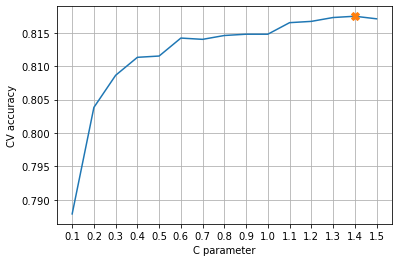

In [10]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig=plt.figure()
ax = fig.gca()
plt.plot(C2,cv.cv_results_["mean_test_score"])
ax.xaxis.set_major_locator(MultipleLocator(0.1))
plt.grid()
plt.plot(cv.best_params_["classifier__C"],cv.best_score_,marker="X",markersize=8)
plt.xlabel("C parameter")
plt.ylabel("CV accuracy")
print("The best parameters are:",cv.best_params_)
print("The CV score of this model is:",cv.best_score_)

In [11]:
model_l1 = Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('classifier',LogisticRegression(solver='saga', penalty='l1',C=1.4,max_iter=4000))])
model_l1.fit(X_train.iloc[small_df_indexes], y_train[small_df_indexes])
print("Train accuracy:", accuracy(y_train[small_df_indexes], model_l1.predict(X_train.iloc[small_df_indexes])))
cv_lasso = cross_val_score(model_l1, X_train.iloc[small_df_indexes], y_train[small_df_indexes], scoring=make_scorer(accuracy), cv=5, n_jobs=-1)
print("CV accuracy: ",np.mean(cv_lasso))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=1.4, max_iter=4000, penalty='l1',
                                    solver='saga'))])

Train accuracy: 0.852975047984645
CV accuracy:  0.8174664107485604


In [30]:
model_l1.named_steps["classifier"].coef_[1]

array([ 0.0927352 ,  0.50418519, -0.94537762,  0.        ,  0.4230076 ,
       -0.02925139,  0.67068708, -0.98076078,  0.19585349, -0.45100859,
        0.91016482,  0.28275812, -0.44325668,  0.6316734 , -0.06017766,
        0.26373518, -0.09975617,  0.56852215,  0.        ,  0.31295042,
        0.95581202,  0.07850542, -0.3611781 , -0.65135422,  0.88554726,
        0.37864194,  0.43453209,  1.48153494,  0.41384833, -0.12663399,
        0.25216565, -0.74496588, -0.03545022,  0.06997819,  0.13554268,
       -0.30635769, -0.70517996,  0.55846415,  0.34128875, -0.22042426,
       -0.42431439,  1.17242837, -0.67313067,  0.42673751,  0.28164039,
       -0.9343847 , -1.2268743 ,  0.        , -0.01201604,  0.44922073,
        0.63221577,  0.80248974,  0.56309468, -1.07018504,  0.66123376,
        0.02686129,  0.68016782,  0.46633486,  0.        , -0.05840908,
        0.49577662,  0.37191484, -0.58697397])

#### Ridge Logistic Regression

In [15]:
C2=np.arange(0.01, 2, 0.3)
model=Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('classifier',LogisticRegression(solver='saga', penalty='l2',max_iter=4000))])

params = {'classifier__C': C2}
cv = GridSearchCV(model, params, refit=True, cv=5, n_jobs=-1,
                  verbose=False,
                  scoring=make_scorer(accuracy))
cv.fit(X_train.iloc[small_df_indexes], y_train[small_df_indexes])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=4000,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.01, 0.31, 0.61, 0.91, 1.21, 1.51, 1.81])},
             scoring=make_scorer(accuracy), verbose=False)

Done!


Text(0.5, 0, 'C parameter')

Text(0, 0.5, 'CV accuracy')

The best parameters are: {'classifier__C': 0.9099999999999999}
The CV score of this model is: 0.8203454894433782


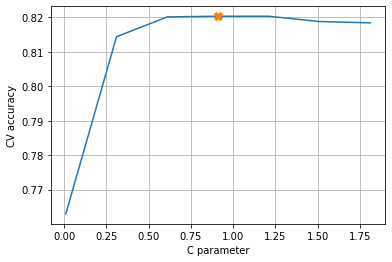

In [16]:
fig=plt.figure()
ax = fig.gca()
plt.plot(C2,cv.cv_results_["mean_test_score"])
#ax.xaxis.set_major_locator(MultipleLocator(0.1))
plt.grid()
plt.plot(cv.best_params_["classifier__C"],cv.best_score_,marker="X",markersize=8)
plt.xlabel("C parameter")
plt.ylabel("CV accuracy")
print("The best parameters are:",cv.best_params_)
print("The CV score of this model is:",cv.best_score_)

In [17]:
model_l2 = Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('classifier',LogisticRegression(solver='saga', penalty='l2',C=0.91,max_iter=4000))])

model_l2.fit(X_train.iloc[small_df_indexes],y_train[small_df_indexes])
print("Train accuracy:", accuracy(y_train[small_df_indexes], model_l2.predict(X_train.iloc[small_df_indexes])))
cv_ridge = cross_val_score(model_l2, X_train.iloc[small_df_indexes], y_train[small_df_indexes], scoring=make_scorer(accuracy), cv=5, n_jobs=-1)
print("CV accuracy: ",np.mean(cv_ridge))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.91, max_iter=4000, solver='saga'))])

Train accuracy: 0.8522072936660269
CV accuracy:  0.8203454894433782


In [31]:
model_l2.named_steps["classifier"].coef_[1]

array([ 0.18162059,  0.47227276, -0.90245305,  0.00615041,  0.48909032,
        0.17076142,  0.56721946, -0.79767897,  0.36600223, -0.36759571,
        0.87497277,  0.29731815, -0.31552354,  0.54557424, -0.25882125,
        0.37152086, -0.34817202,  0.44653666,  0.12982019,  0.3506273 ,
        0.93073962,  0.07701815, -0.38909955, -0.53119345,  0.89078714,
        0.3155088 ,  0.47347925,  1.53589492,  0.51922545, -0.1531033 ,
        0.23385087, -0.67308307, -0.14759775,  0.07948218,  0.11659786,
       -0.30362705, -0.77339001,  0.52297321,  0.37517524, -0.14786247,
       -0.40201177,  1.07643658, -0.59307905,  0.42043666,  0.36761826,
       -0.91433355, -1.05681333, -0.03724924, -0.01989565,  0.43479231,
        0.38341292,  0.70510049,  0.50502866, -0.90447004,  0.58341568,
       -0.05309509,  0.73892178,  0.48779168, -0.0083108 , -0.14466856,
        0.36093759,  0.40819147, -0.42835552])

In [35]:
(model_l2.named_steps["classifier"].coef_[1] - model_l1.named_steps["classifier"].coef_[1])/model_l2.named_steps["classifier"].coef_[1]

array([ 0.48940148, -0.06757203, -0.04756433,  1.        ,  0.13511353,
        1.17129974, -0.18241198, -0.22951816,  0.46488443, -0.22691474,
       -0.04022074,  0.0489712 , -0.4048292 , -0.15781384,  0.76749337,
        0.29012012,  0.71348596, -0.27318136,  1.        ,  0.10745563,
       -0.02693815, -0.01931066,  0.07175915, -0.22620905,  0.00588229,
       -0.20009947,  0.08225738,  0.03539303,  0.20295061,  0.17288531,
       -0.07831822, -0.10679634,  0.75981869,  0.11957388, -0.16247997,
       -0.0089934 ,  0.08819619, -0.06786378,  0.09032175, -0.49073835,
       -0.05547754, -0.08917552, -0.13497632, -0.01498644,  0.23387813,
       -0.0219298 , -0.16091864,  1.        ,  0.39604682, -0.03318462,
       -0.64891622, -0.13812109, -0.1149757 , -0.18321779, -0.13338359,
        1.50590901,  0.0795131 ,  0.04398767,  1.        ,  0.59625586,
       -0.37357989,  0.08887161, -0.37029626])

As we can see we have that some coefficents calculated by ridge and lasso are different, while there is a considerable number of coefficent that have a difference < 10%, suggesting that those estimates can be valid estimates.

Since logistic regression with ridge and lasso have returned similar results and lasso put very few coefficent to 0, we decided for now to not perform feature selection with logistic regression, because it will take a really huge amount of time.

By the way, after checking some other classification algorithm, if the logistic regression have the best result, we will perfom feature selection. For now we are satisfied with just the model below, which contains all the features except those less important.

In [54]:
less_imp_corr_covs.discard('ACA')
less_imp_corr_covs.discard('AGA')

model = LogisticRegression(solver="saga",penalty = "none", max_iter = 8000)
model.fit(X_train.iloc[small_df_indexes].drop(less_imp_corr_covs, axis = 1), y_train[small_df_indexes])

cv_newton = cross_val_score(model,
                            X_train.iloc[small_df_indexes].drop(less_imp_corr_covs, axis = 1),
                            y_train[small_df_indexes],
                            scoring=make_scorer(accuracy), cv=5, n_jobs=-1)
print("Train accuracy:", accuracy(y_train[small_df_indexes],
                                  model.predict(X_train.iloc[small_df_indexes].drop(less_imp_corr_covs, axis = 1))))
print("CV accuracy: ",np.mean(cv_newton))

LogisticRegression(max_iter=8000, penalty='none', solver='saga')

Train accuracy: 0.22418426103646832
CV accuracy:  0.22418426103646832


### Linear Discriminant Analysis

The linear discriminant analysis models the posterior probabilities as a linear function of x, but the relation is found through the Bayes Theorem.

LDA assumes that the density functions P(X|Y=k) of X in class K are distributed as a multivariate Gaussian, so first of all we check if this assumption is satisfied.

array([[<AxesSubplot:title={'center':'CUA'}>,
        <AxesSubplot:title={'center':'AGG'}>],
       [<AxesSubplot:title={'center':'UGA'}>,
        <AxesSubplot:title={'center':'AAG'}>],
       [<AxesSubplot:title={'center':'GAU'}>,
        <AxesSubplot:title={'center':'UGU'}>]], dtype=object)

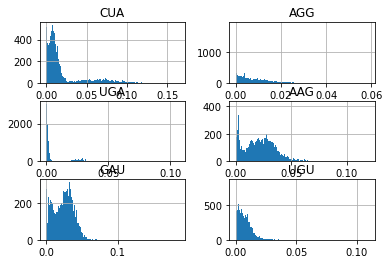

In [8]:
#calculated at preliminary analysis
most_important_feature = ['CUA', 'AGG', 'UGA', 'AAG', 'GAU', 'UGU']

X_train.hist(column=most_important_feature, bins = 200)

The most important covariates doesn't seems to be distributed as a gaussian, so we expect that this method doesn't perform well.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model = model.fit(X_train, y_train)

print("Train accuracy:", accuracy(y_train, model.predict(X_train)))
cv_lda = cross_val_score(model, X_train, y_train, scoring=make_scorer(accuracy), cv=5,n_jobs=-1)
print("CV score:", np.mean(cv_lda))

Train accuracy: 0.7960084436768374
CV score: 0.7901543333471419


For LDA there are not shrinkage methods, so we proceed with feature selection in order to have a model with less covariates.

In [36]:
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def forward_ff(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0,plot_results=True, 
               dummyModel = DummyRegressor,mod = LinearRegression,**kwargs):   # estimator and parameters
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    if plot_results==True:    
        plt.figure()
        candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    if(dummyModel == DummyClassifier):
        model = dummyModel(strategy = 'prior')
    else :
        model = dummyModel()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    if plot_results==True:
        _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    score_3=score
    dim=0
    if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, []))
            print("M{} CV score (2.): {}".format(dim, score_3))
        
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(1,len(all_features)+1):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = mod(**kwargs)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
        if plot_results==True:
            
            _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        step3_score=score
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} CV score (3.): {}".format(dim, step3_score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    best_score = subsets_metric[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Score step: {}".format(best_score))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    if plot_results==True:
        best_candidate_score_idx = candidates_argbest(best_candidate_metric)
        _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
        _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
        candidate_fig.set_title(candidates_scorer_name)
        candidate_fig.legend()
    
        # Plot a figure to show how te 3. metric evolves
        plt.figure()
        subsets_fig = plt.subplot(111)
        _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
        _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
        subsets_fig.set_title(subsets_scorer_name)
        subsets_fig.legend()
    return(best_features,best_score,subsets_metric)

............
Best model (M0) with 0 features: []
M0 CV score (2.): 0.22414122444846427
............
Best model (M1) with 1 features: ['CUA']
M1 CV score (3.): 0.40184284050686514
............
Best model (M2) with 2 features: ['CUA', 'AGG']
M2 CV score (3.): 0.4890615722393295
............
Best model (M3) with 3 features: ['CUA', 'AGG', 'UGU']
M3 CV score (3.): 0.5355990370851111
............
Best model (M4) with 4 features: ['CUA', 'AGG', 'UGU', 'GAA']
M4 CV score (3.): 0.5606423268295153
............
Best model (M5) with 5 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU']
M5 CV score (3.): 0.5855894631703467
............
Best model (M6) with 6 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC']
M6 CV score (3.): 0.6114949115563595
............
Best model (M7) with 7 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU']
M7 CV score (3.): 0.6323167492877099
............
Best model (M8) with 8 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU']
M8 CV score (3.): 0.64690

............
Best model (M38) with 38 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU', 'GGA', 'CCC', 'GCC', 'GGC', 'CUG', 'AAG', 'UGA', 'UAC', 'AAA', 'ACG', 'UCG', 'AUC', 'UCA', 'CAU', 'UAU', 'AUA', 'UUA', 'UCC', 'AUG', 'GAG', 'UCU', 'GCA', 'AGC', 'CCG', 'GAU', 'UUG', 'GUA', 'CAG', 'UGC', 'CGU']
M38 CV score (3.): 0.7754748063353539
............
Best model (M39) with 39 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU', 'GGA', 'CCC', 'GCC', 'GGC', 'CUG', 'AAG', 'UGA', 'UAC', 'AAA', 'ACG', 'UCG', 'AUC', 'UCA', 'CAU', 'UAU', 'AUA', 'UUA', 'UCC', 'AUG', 'GAG', 'UCU', 'GCA', 'AGC', 'CCG', 'GAU', 'UUG', 'GUA', 'CAG', 'UGC', 'CGU', 'CGG']
M39 CV score (3.): 0.7775854863134445
............
Best model (M40) with 40 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU', 'GGA', 'CCC', 'GCC', 'GGC', 'CUG', 'AAG', 'UGA', 'UAC', 'AAA', 'ACG', 'UCG', 'AUC', 'UCA', 'CAU', 'UAU', 'AUA', 'UUA', 'UCC', 'AUG', 'GAG', 'UCU', 'GCA', 'AGC', 'CCG', 'GAU', 'UUG', 

............
Best model (M58) with 58 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU', 'GGA', 'CCC', 'GCC', 'GGC', 'CUG', 'AAG', 'UGA', 'UAC', 'AAA', 'ACG', 'UCG', 'AUC', 'UCA', 'CAU', 'UAU', 'AUA', 'UUA', 'UCC', 'AUG', 'GAG', 'UCU', 'GCA', 'AGC', 'CCG', 'GAU', 'UUG', 'GUA', 'CAG', 'UGC', 'CGU', 'CGG', 'CCA', 'GAC', 'CUC', 'AAC', 'Ncodons', 'AGU', 'GUU', 'CCU', 'CGC', 'CAA', 'CAC', 'GUG', 'CGA', 'GUC', 'GCU', 'UUU', 'GGU', 'UAG', 'UAA']
M58 CV score (3.): 0.7846853726232066
............
Best model (M59) with 59 features: ['CUA', 'AGG', 'UGU', 'GAA', 'AUU', 'UUC', 'CUU', 'ACU', 'GGA', 'CCC', 'GCC', 'GGC', 'CUG', 'AAG', 'UGA', 'UAC', 'AAA', 'ACG', 'UCG', 'AUC', 'UCA', 'CAU', 'UAU', 'AUA', 'UUA', 'UCC', 'AUG', 'GAG', 'UCU', 'GCA', 'AGC', 'CCG', 'GAU', 'UUG', 'GUA', 'CAG', 'UGC', 'CGU', 'CGG', 'CCA', 'GAC', 'CUC', 'AAC', 'Ncodons', 'AGU', 'GUU', 'CCU', 'CGC', 'CAA', 'CAC', 'GUG', 'CGA', 'GUC', 'GCU', 'UUU', 'GGU', 'UAG', 'UAA', 'AAU']
M59 CV score (3.): 0.7854524825437155

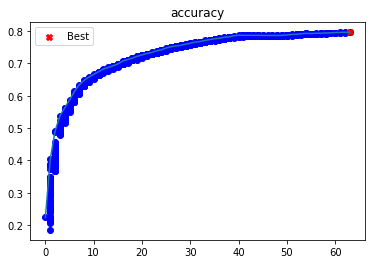

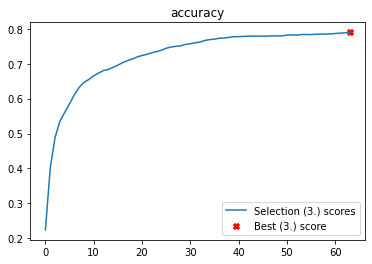

In [38]:
bf_lda,bscore,scores=forward_ff(X_train, y_train, X_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.b
                  get_cv_evaluator(make_scorer(accuracy), cv=5), np.argmax, # 3.
                  #get_evaluator(make_scorer(accuracy)), np.argmax, # test
                  candidates_scorer_name="accuracy",
                  subsets_scorer_name="accuracy",
                  verbose=True,
                   dummyModel=DummyClassifier,mod=LDA)

The model that have the best CV accuracy is the model with all the features, which seems to be in accordance with the result obtained with the lasso regression, in which very few coefficent are put to 0.

### Quadratic Discriminant Analysis

QDA is a model which extend the LDA, by allowing that density functions (multivariate gaussians distributions) must have the same covariance matrix.

Since the gaussian hypotesis isn't right, we expect that this model doesn't perform really well. We procede with QDA and feature selection, in order to find the best model with QDA.

['CUA',
 'AGG',
 'CUU',
 'UGU',
 'UUC',
 'CUG',
 'GAA',
 'GCC',
 'CCC',
 'AAG',
 'ACU',
 'CGU',
 'UAU',
 'UAC',
 'CCA',
 'GGG',
 'GGA',
 'UCA',
 'CCU',
 'GAU',
 'AUC',
 'ACG',
 'UUG',
 'AUU',
 'GAG',
 'GUA',
 'AUA',
 'UCG',
 'GUC',
 'AAU',
 'CAC',
 'CGG',
 'CAU',
 'UGC',
 'GGC',
 'CCG',
 'AUG',
 'GCA',
 'AAA',
 'UCU',
 'CAG',
 'CGA',
 'UCC',
 'GUG',
 'GAC',
 'UGG',
 'UUA']

0.8332369958160152

[0.22414122444846427,
 0.43888054239909413,
 0.5216843185720138,
 0.5607368232093788,
 0.590483436667173,
 0.6155254376153587,
 0.6385530961027723,
 0.668393837712939,
 0.6872962896477445,
 0.7054315396051681,
 0.7178081718885927,
 0.7311452795537082,
 0.7411247508710882,
 0.750142964323359,
 0.7556119250472941,
 0.7621373304427476,
 0.7665505369217103,
 0.7741305458512269,
 0.7786404580749988,
 0.7835336030599704,
 0.7863160680668517,
 0.7918816424787234,
 0.7943766138720502,
 0.7980226644020676,
 0.80022963586904,
 0.8013807150057305,
 0.803587824558012,
 0.8088651228729109,
 0.8109759409363105,
 0.8128948204200555,
 0.8144303290572914,
 0.8150056384834551,
 0.8158695922340822,
 0.8162529630805911,
 0.8183639192292999,
 0.820666445730172,
 0.8235452482543716,
 0.8241210179648988,
 0.827479252682307,
 0.8286309301886705,
 0.8275749918299524,
 0.8295902548594523,
 0.8315095946275608,
 0.8326609039064333,
 0.8317012570365974,
 0.8306459630759884,
 0.8317015792356518,
 0.8332369958160152

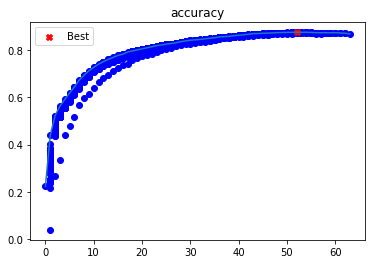

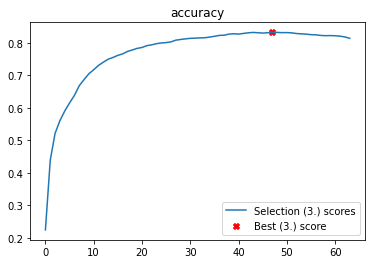

In [43]:
%%capture --no-stdout --no-display

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

bf_qda,bscore,scores=forward_ff(X_train, y_train, X_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.b
                  get_cv_evaluator(make_scorer(accuracy), cv=5), np.argmax, # 3.
                  candidates_scorer_name="accuracy",
                  subsets_scorer_name="accuracy",
                  verbose=False,
                   dummyModel=DummyClassifier,mod=QDA,store_covariance=True)
bf_qda
bscore
scores

In [44]:
len(bf_qda)

47

QDA perform better than LDA and use a model with less covariates, so it is preferable.

### K Nearest Neighbors

KNN is a non parametric method, so it doesn't have a training step. Since KNN have problems with highly dimensional data, first of all we try with all the features, then we try without the less important correlated features and finally with the best 15 principal component.

In [48]:
from sklearn.neighbors import KNeighborsClassifier

k=np.arange(1,100,1)
params = {'n_neighbors': k}
knn=KNeighborsClassifier()
cv = GridSearchCV(knn, params, scoring=make_scorer(accuracy), cv=5,verbose=False,n_jobs=-1)
cv = cv.fit(X_train, y_train)

In [50]:
print(cv.best_params_)
print("CV score", cv.best_score_)
resknn=pd.DataFrame(cv.cv_results_)
resknn.sort_values(by="rank_test_score")

{'n_neighbors': 9}
CV score 0.3560733601218833


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.128656,0.005107,0.218902,0.006621,9,{'n_neighbors': 9},0.359712,0.355875,0.357006,0.353167,0.354607,0.356073,0.002225,1
4,0.127347,0.002397,0.209689,0.002127,5,{'n_neighbors': 5},0.353957,0.356835,0.348369,0.345969,0.370921,0.355210,0.008755,2
7,0.125489,0.002594,0.214922,0.000630,8,{'n_neighbors': 8},0.357314,0.349161,0.354127,0.348369,0.364203,0.354635,0.005800,3
9,0.129699,0.004401,0.218011,0.005191,10,{'n_neighbors': 10},0.360192,0.356355,0.356526,0.343090,0.351248,0.353482,0.005925,4
5,0.127511,0.002350,0.214144,0.004398,6,{'n_neighbors': 6},0.349161,0.345803,0.345489,0.353647,0.369482,0.352716,0.008884,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.154037,0.037651,0.362837,0.052460,93,{'n_neighbors': 93},0.344365,0.330456,0.332534,0.325816,0.332054,0.333045,0.006137,95
93,0.137211,0.026141,0.310955,0.051238,94,{'n_neighbors': 94},0.341487,0.334772,0.333493,0.325816,0.329175,0.332949,0.005322,96
91,0.126400,0.002496,0.344556,0.037771,92,{'n_neighbors': 92},0.346283,0.330456,0.328695,0.324376,0.331574,0.332277,0.007419,97
90,0.141728,0.027404,0.301005,0.022528,91,{'n_neighbors': 91},0.346283,0.329496,0.330134,0.321017,0.333493,0.332085,0.008204,98


Text(0.5, 1.0, 'k nearest neighbors')

Text(0.5, 0, 'n neighbors')

Text(0, 0.5, 'accuracy')

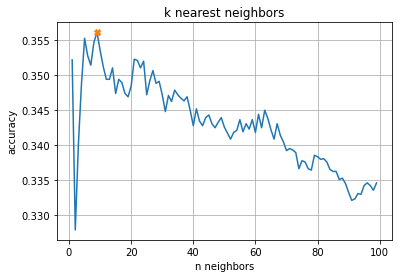

In [51]:
plt.plot(resknn["param_n_neighbors"],resknn["mean_test_score"])
plt.plot(cv.best_params_['n_neighbors'],cv.best_score_,marker="X")
plt.grid()
plt.title("k nearest neighbors")
plt.xlabel("n neighbors")
plt.ylabel("accuracy")

KNN perform very badly with all the covariates.

In [64]:
less_imp_corr_covs.discard('ACA')
less_imp_corr_covs.discard('AGA')

k=np.arange(1,100,1)
params = {'n_neighbors': k}
knn=KNeighborsClassifier()
cv = GridSearchCV(knn, params, scoring=make_scorer(accuracy), cv=5,verbose=False,n_jobs=-1)
cv = cv.fit(X_train.drop(less_imp_corr_covs, axis = 1), y_train)

In [65]:
print(cv.best_params_)
print("CV score", cv.best_score_)
resknn=pd.DataFrame(cv.cv_results_)
resknn.sort_values(by="rank_test_score")

{'n_neighbors': 8}
CV score 0.35540281786087446


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.099169,0.002337,0.195343,0.014237,8,{'n_neighbors': 8},0.352518,0.350120,0.356526,0.349328,0.368522,0.355403,0.007022,1
8,0.118788,0.022518,0.216374,0.049881,9,{'n_neighbors': 9},0.358273,0.355396,0.356526,0.353647,0.353167,0.355402,0.001875,2
9,0.103131,0.006268,0.215020,0.008782,10,{'n_neighbors': 10},0.360671,0.358273,0.357965,0.345010,0.347889,0.353962,0.006272,3
4,0.116799,0.010696,0.190447,0.007912,5,{'n_neighbors': 5},0.349161,0.353477,0.347409,0.348848,0.369482,0.353675,0.008159,4
21,0.103089,0.002891,0.207301,0.007020,22,{'n_neighbors': 22},0.360671,0.345803,0.350768,0.345489,0.358445,0.352235,0.006305,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.098432,0.003059,0.263657,0.004928,92,{'n_neighbors': 92},0.347242,0.330935,0.330134,0.325336,0.331094,0.332948,0.007452,95
97,0.101283,0.003472,0.260230,0.007333,98,{'n_neighbors': 98},0.341966,0.328537,0.330134,0.333493,0.330134,0.332853,0.004835,96
93,0.100761,0.004816,0.262724,0.002873,94,{'n_neighbors': 94},0.342446,0.333813,0.332534,0.324856,0.329175,0.332565,0.005833,97
90,0.100375,0.005382,0.261397,0.003515,91,{'n_neighbors': 91},0.346283,0.329496,0.331094,0.321977,0.333493,0.332469,0.007908,98


Text(0.5, 1.0, 'k nearest neighbors')

Text(0.5, 0, 'n neighbors')

Text(0, 0.5, 'accuracy')

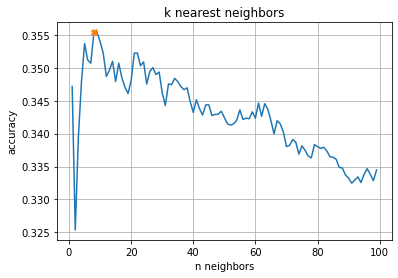

In [66]:
plt.plot(resknn["param_n_neighbors"],resknn["mean_test_score"])
plt.plot(cv.best_params_['n_neighbors'],cv.best_score_,marker="X")
plt.grid()
plt.title("k nearest neighbors")
plt.xlabel("n neighbors")
plt.ylabel("accuracy")

It doesn't have great chances. Now we try with PCA.

In [68]:
from sklearn.decomposition import PCA
X_train = (X_train-X_train.mean())/ X_train.std()

pca = PCA()
X_pca = pca.fit(X_train)
X_prj = pca.fit_transform(X_train)

In [69]:
k=np.arange(1,100,1)
params = {'n_neighbors': k}
knn=KNeighborsClassifier()
cv = GridSearchCV(knn, params, scoring=make_scorer(accuracy), cv=5,verbose=False,n_jobs=-1)
cv = cv.fit(X_prj[:,0:15], y_train)

In [70]:
print(cv.best_params_)
print("CV score", cv.best_score_)
resknn=pd.DataFrame(cv.cv_results_)
resknn.sort_values(by="rank_test_score")

{'n_neighbors': 9}
CV score 0.7735568013919


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.041103,0.002372,0.850039,0.024275,9,{'n_neighbors': 9},0.771703,0.766427,0.778311,0.780710,0.770633,0.773557,0.005227,1
10,0.040543,0.000972,0.901917,0.077747,11,{'n_neighbors': 11},0.765947,0.758753,0.775912,0.776871,0.768234,0.769144,0.006701,2
12,0.047355,0.017206,0.872372,0.058777,13,{'n_neighbors': 13},0.768825,0.761631,0.773992,0.773033,0.765835,0.768663,0.004582,3
6,0.041334,0.002936,0.820147,0.021609,7,{'n_neighbors': 7},0.764029,0.766906,0.773033,0.774472,0.763436,0.768375,0.004568,4
11,0.044330,0.005191,0.909393,0.052016,12,{'n_neighbors': 12},0.769784,0.757314,0.772553,0.777351,0.760557,0.767512,0.007480,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.039947,0.001408,1.133230,0.007117,98,{'n_neighbors': 98},0.744844,0.732374,0.730326,0.733205,0.725528,0.733256,0.006378,95
96,0.039965,0.001319,1.124141,0.013188,97,{'n_neighbors': 97},0.743885,0.729976,0.730806,0.734165,0.725048,0.732776,0.006273,96
98,0.039682,0.000862,0.984994,0.211243,99,{'n_neighbors': 99},0.743405,0.730456,0.729367,0.732726,0.726008,0.732392,0.005917,97
0,0.059845,0.019342,0.618717,0.024180,1,{'n_neighbors': 1},0.732854,0.716067,0.740403,0.730806,0.737044,0.731435,0.008372,98


Text(0.5, 1.0, 'k nearest neighbors')

Text(0.5, 0, 'n neighbors')

Text(0, 0.5, 'accuracy')

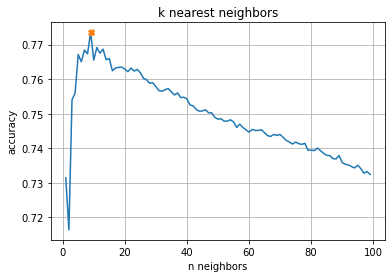

In [71]:
plt.plot(resknn["param_n_neighbors"],resknn["mean_test_score"])
plt.plot(cv.best_params_['n_neighbors'],cv.best_score_,marker="X")
plt.grid()
plt.title("k nearest neighbors")
plt.xlabel("n neighbors")
plt.ylabel("accuracy")

With the first 15 PC, KNN perform well respect to the others KNNs, but produces still worse results than the others methods.